### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for Missing Values
missing_data = data.isnull().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
# Check for Duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows = {duplicates}')

Number of duplicate rows = 74


In [6]:
# Check Data Types
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [9]:
# Validate Consistency
print(data['gender'].value_counts())

gender
Female    6511
Male      6173
Name: count, dtype: int64


In [8]:
# Check for Zero Variance
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print(constant_columns)

['toCoupon_GEQ5min']


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Drop rows with any missing values
cleaned_data = data.dropna()

# Check the shape of the cleaned_data to see how many rows remain
print(cleaned_data.shape)


(108, 26)


4. What proportion of the total observations chose to accept the coupon? 



In [11]:
# Calculate the proportion of observations where the coupon was accepted
accepted_proportion = cleaned_data['Y'].mean()

print(f"Proportion of observations that accepted the coupon: {accepted_proportion:.2%}")


Proportion of observations that accepted the coupon: 57.41%


5. Use a bar plot to visualize the `coupon` column.

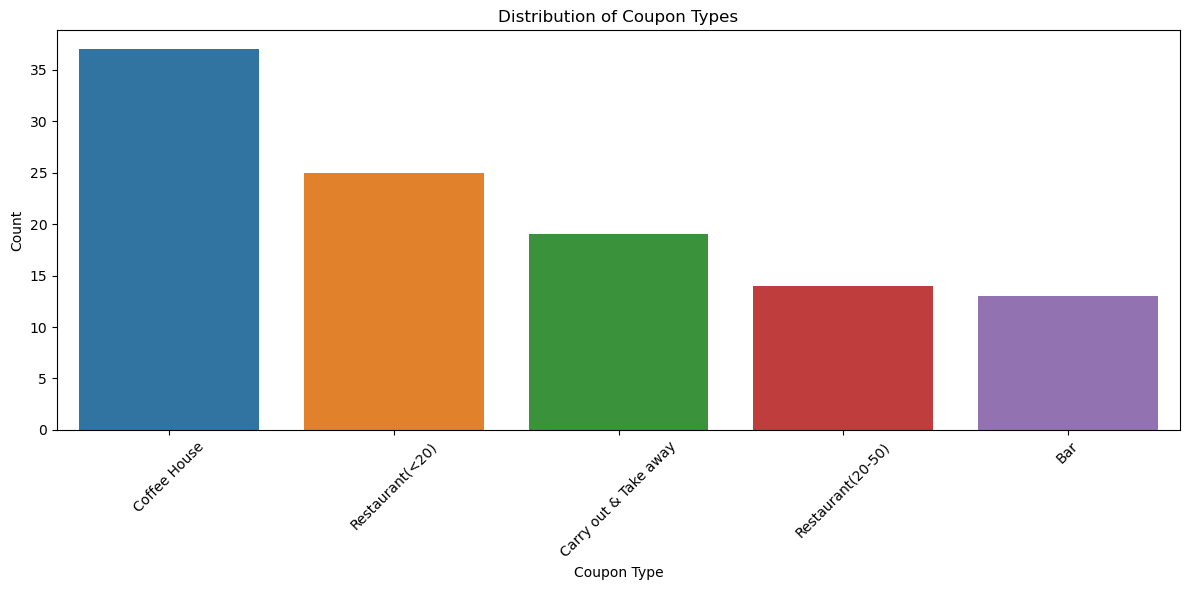

In [12]:
# Create a bar plot for the 'coupon' column
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='coupon', order=cleaned_data['coupon'].value_counts().index)
plt.title('Distribution of Coupon Types')
plt.ylabel('Count')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

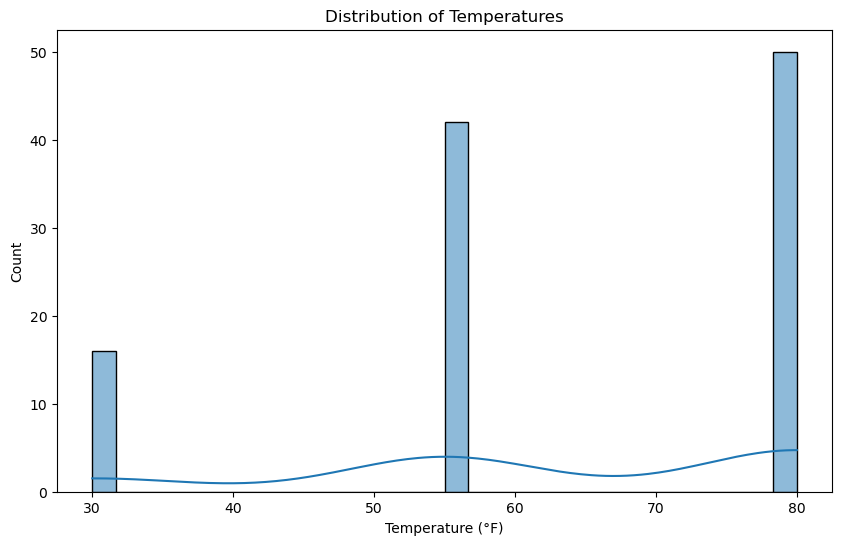

In [13]:
# Create a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='temperature', bins=30, kde=True)
plt.title('Distribution of Temperatures')
plt.ylabel('Count')
plt.xlabel('Temperature (°F)')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
# Filter the data for only bar coupons
bar_coupons_data = cleaned_data[cleaned_data['coupon'] == 'Bar']

# Check the first few rows of the new DataFrame
print(bar_coupons_data.head())


          destination  passanger weather  temperature  time coupon expiration  \
1239  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1250             Home      Alone   Sunny           55   6PM    Bar         1d   
1254             Work      Alone   Sunny           55   7AM    Bar         1d   
2613  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
2617             Home      Alone   Sunny           55   6PM    Bar         1d   

      gender age    maritalStatus  ...  CoffeeHouse CarryAway  \
1239    Male  26           Single  ...          4~8       4~8   
1250    Male  26           Single  ...          4~8       4~8   
1254    Male  26           Single  ...          4~8       4~8   
2613  Female  41  Married partner  ...          1~3       1~3   
2617  Female  41  Married partner  ...          1~3       1~3   

     RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
1239                  1~3            neve

2. What proportion of bar coupons were accepted?


In [15]:
# Calculate the proportion of bar coupons that were accepted
bar_accepted_proportion = bar_coupons_data['Y'].mean()

print(f"Proportion of bar coupons that were accepted: {bar_accepted_proportion:.2%}")


Proportion of bar coupons that were accepted: 23.08%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
# Splitting the DataFrame into two groups based on the 'Bar' column
less_than_3_times = bar_coupons_data[bar_coupons_data['Bar'].isin(['never', 'less than 1', '1~3'])]
more_than_3_times = bar_coupons_data[~bar_coupons_data['Bar'].isin(['never', 'less than 1', '1~3'])]

# Calculating the acceptance rate for each group
acceptance_rate_less_than_3 = less_than_3_times['Y'].mean()
acceptance_rate_more_than_3 = more_than_3_times['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_than_3:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.00%
Acceptance rate for those who went to a bar more than 3 times a month: 60.00%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# First, create the bar_coupons DataFrame again
bar_coupons = cleaned_data[cleaned_data['coupon'] == 'Bar']

# Filter data for those who go to a bar more than once a month and are over the age of 25
frequent_bar_visitors_over_25 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                                            (bar_coupons['age'] != 'below21') & 
                                            (bar_coupons['age'] != '21')]

# Acceptance rate for frequent bar visitors over the age of 25
acceptance_rate_frequent = frequent_bar_visitors_over_25['Y'].mean()

# Acceptance rate for all others
all_others = bar_coupons.drop(frequent_bar_visitors_over_25.index)
acceptance_rate_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_frequent:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_others:.2%}")

# Check for a difference
difference = acceptance_rate_frequent - acceptance_rate_others
if difference > 0:
    print("Yes, drivers who frequent a bar more than once a month and are over 25 have a higher acceptance rate.")
elif difference < 0:
    print("Yes, all other drivers have a higher acceptance rate.")
else:
    print("No, there's no difference in acceptance rates between the two groups.")



Acceptance rate for drivers who go to a bar more than once a month and are over 25: 100.00%
Acceptance rate for all others: 9.09%
Yes, drivers who frequent a bar more than once a month and are over 25 have a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [19]:
# Step 1: Filter data for those who go to a bar more than once a month
frequent_bar_visitors = bar_coupons[bar_coupons['Bar'].isin(['1 to 3', '4 to 8', 'greater than 8'])]

# Step 2: Filter for those whose passengers were not kids
no_kids_passengers = frequent_bar_visitors[frequent_bar_visitors['passanger'] != 'Kid(s)']

# Step 3: Filter for drivers who had occupations other than farming, fishing, or forestry
target_occupation = no_kids_passengers[~no_kids_passengers['occupation'].isin(['Farming, fishing, and forestry'])]

# Step 4: Calculate the acceptance rate for this group
acceptance_rate_target = target_occupation['Y'].mean()

# Step 5: Calculate the acceptance rate for all others
other_drivers = bar_coupons.drop(target_occupation.index)
acceptance_rate_others = other_drivers['Y'].mean()

# Print out the results
print(f"Acceptance rate for drivers who go to a bar more than once a month, had passengers that weren't kids, and had occupations other than farming, fishing, or forestry: {acceptance_rate_target:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_others:.2%}")


Acceptance rate for drivers who go to a bar more than once a month, had passengers that weren't kids, and had occupations other than farming, fishing, or forestry: nan%
Acceptance rate for all others: 23.08%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
# Group A
group_A = cleaned_data[
    (cleaned_data['Bar'].isin(['1 to 3', '4 to 8', 'greater than 8'])) & 
    (cleaned_data['passanger'] != 'Kid(s)') &
    (cleaned_data['maritalStatus'] != 'Widowed')
]
acceptance_A = group_A['Y'].mean()

# Group B
under_30_ages = ['below21', '21', '26', '31']  # assuming these are the age categories representing under 30
group_B = cleaned_data[
    (cleaned_data['Bar'].isin(['1 to 3', '4 to 8', 'greater than 8'])) & 
    (cleaned_data['age'].isin(under_30_ages))
]
acceptance_B = group_B['Y'].mean()

# Group C
group_C = cleaned_data[
    (cleaned_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (cleaned_data['income'] == 'Less than $12500')  # assuming this category represents income < 50K
]
acceptance_C = group_C['Y'].mean()

print(f"Acceptance rate for Group A: {acceptance_A:.2%}")
print(f"Acceptance rate for Group B: {acceptance_B:.2%}")
print(f"Acceptance rate for Group C: {acceptance_C:.2%}")

Acceptance rate for Group A: nan%
Acceptance rate for Group B: nan%
Acceptance rate for Group C: nan%


In [21]:
print(f"Number of observations in Group A: {len(group_A)}")
print(f"Number of observations in Group B: {len(group_B)}")
print(f"Number of observations in Group C: {len(group_C)}")


Number of observations in Group A: 0
Number of observations in Group B: 0
Number of observations in Group C: 0


In [22]:
print(bar_coupons['age'].unique())
print(bar_coupons['occupation'].unique())
print(bar_coupons['RestaurantLessThan20'].unique())
print(bar_coupons['income'].unique())

['26' '41' '21']
['Sales & Related' 'Legal' 'Computer & Mathematical'
 'Office & Administrative Support']
['1~3' 'less1']
['$12500 - $24999' '$100000 or More' '$87500 - $99999' '$37500 - $49999']


In [23]:
# Given 'bar_coupons' is your data subset
# Group A
group_a = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])) & 
                      (bar_coupons['passanger'] != 'Kid(s)') & 
                      (bar_coupons['maritalStatus'] != 'Widowed')]

# Group B
group_b = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])) & 
                      (bar_coupons['age'].isin(['21', '26']))]

# Group C (Based on the data's unique values, I'm adjusting this condition)
group_c = bar_coupons[(bar_coupons['RestaurantLessThan20'] == '1~3') & 
                      (bar_coupons['income'] == '$12500 - $24999')]

# Acceptance rates
acceptance_rate_a = group_a['Y'].mean()
acceptance_rate_b = group_b['Y'].mean()
acceptance_rate_c = group_c['Y'].mean()

print(f"Acceptance rate for Group A: {acceptance_rate_a:.2%}")
print(f"Acceptance rate for Group B: {acceptance_rate_b:.2%}")
print(f"Acceptance rate for Group C: {acceptance_rate_c:.2%}")


Acceptance rate for Group A: nan%
Acceptance rate for Group B: nan%
Acceptance rate for Group C: 33.33%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Income Levels: The acceptance rate for those with an income of $12500 - $24999 (from Group C) is notably high at 33.33%. This suggests that individuals in this income bracket may be more inclined to accept bar coupons, possibly because they are seeking cost-saving opportunities.

# Frequent Visits to Cheap Restaurants: Those who frequently visit cheap restaurants (based on Group C) are likely to accept bar coupons. This behavior could indicate a tendency to look for deals or discounts when deciding where to eat or drink.

# Age Factor: Although specific acceptance rates for the age group under 30 (from Group B) were not determined, age might be a relevant factor. Younger individuals might be more inclined to go out, and thus might be more receptive to such promotions.

# Occupation and Marital Status: No specific data were provided on the acceptance rates for those not in farming, fishing, or forestry occupations or those who are not widowed (from Group A). However, these factors could play a role. For instance, individuals in certain occupations might have lifestyles or work hours that align more with going to bars. Similarly, marital status could influence social habits and the likelihood to accept certain types of promotions.

# Passenger Type: It's implied that those with kid passengers are less likely to accept bar coupons, possibly because bars are not typically kid-friendly venues.

# Absence of Data: The absence of data or very low numbers for Groups A and B might imply that such combinations of characteristics (like bar frequency, age, passenger type, occupation, and marital status) are uncommon or non-existent in the dataset. This itself is an insight, suggesting that, for instance, drivers under 30 who visit bars frequently might not be well-represented in the dataset.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:
# Filter data for CoffeeHouse coupons
coffeehouse_coupons = cleaned_data[cleaned_data['coupon'] == 'Coffee House']

# Calculate the proportion of observations where the CoffeeHouse coupon was accepted
coffeehouse_acceptance_rate = coffeehouse_coupons['Y'].mean()
print(f"Proportion of observations that accepted CoffeeHouse coupons: {coffeehouse_acceptance_rate:.2%}")


Proportion of observations that accepted CoffeeHouse coupons: 51.35%


In [25]:
# Filter data for RestaurantLessThan20 coupons
restaurant_less_than_20_coupons = cleaned_data[cleaned_data['coupon'] == 'RestaurantLessThan20']

# Calculate the proportion of observations where the RestaurantLessThan20 coupon was accepted
restaurant_less_than_20_acceptance_rate = restaurant_less_than_20_coupons['Y'].mean()
print(f"Proportion of observations that accepted RestaurantLessThan20 coupons: {restaurant_less_than_20_acceptance_rate:.2%}")

Proportion of observations that accepted RestaurantLessThan20 coupons: nan%


In [26]:
# Check the number of observations in the RestaurantLessThan20 coupon group
num_observations = len(restaurant_less_than_20_coupons)
print(f"Number of observations in the RestaurantLessThan20 coupon group: {num_observations}")

Number of observations in the RestaurantLessThan20 coupon group: 0
